In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train.csv', header=0)        # Load the train file into a dataframe
test_df = pd.read_csv('test.csv', header=0)        # Load the test file into a dataframe
#print('type(train_df)'+type(train_df)._name_)
#df_list = [train_df,test_df]

full_df = pd.concat([train_df,test_df], ignore_index=True)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [9]:
def extract_df():
    tr_df= full_df.loc[full_df['Survived'].notnull()]
    tr_df.info()
    te_df = full_df.loc[full_df['Survived'].isnull()]
    te_df.info()
    return tr_df, te_df

In [10]:
train_df, test_df = extract_df()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survi

In [11]:
title_sr = full_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 
full_df['Title'] = title_sr
pd.crosstab(full_df['Title'], full_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [12]:
print(title_sr.value_counts())

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Lady          1
Jonkheer      1
Capt          1
Dona          1
Don           1
Mme           1
Sir           1
Countess      1
Name: Name, dtype: int64


In [13]:
title_list = set(title_sr)
print(title_list)
map_title_dic={"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}

working_dic = {}
for key in ['Lady', 'Countess','Capt', 'Col','Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']:
    working_dic[key] = "Rare"
    
map_title_dic.update(working_dic)

full_df["Title"] = full_df["Title"].replace(map_title_dic)

print(set(list(full_df["Title"])))

{'Mlle', 'Col', 'Capt', 'Countess', 'Master', 'Rev', 'Lady', 'Dr', 'Mme', 'Sir', 'Major', 'Miss', 'Mr', 'Jonkheer', 'Mrs', 'Dona', 'Ms', 'Don'}
{'Rare', 'Master', 'Dr', 'Miss', 'Mr', 'Mrs'}


In [14]:
SubCol01 = test_df.PassengerId
try: full_df.drop(["PassengerId","Name","Ticket","Cabin"], axis=1,inplace=True)  
except: print("except")
train_df, test_df = extract_df()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 69.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  0 non-null      float64
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-n

In [15]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [16]:
feature_list = list(full_df)
print(feature_list)

for feature in feature_list:
    print(feature +"  "+ str(len(full_df[feature].value_counts())))

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']
Survived  2
Pclass  3
Sex  2
Age  98
SibSp  7
Parch  8
Fare  281
Embarked  3
Title  6


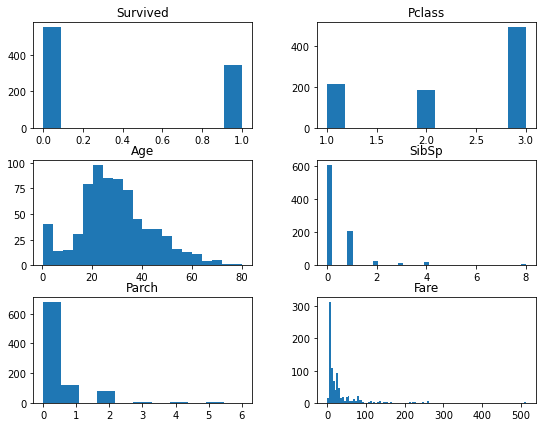

In [17]:
train_df.hist(bins="auto",figsize=(9,7),grid=False);

In [18]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [19]:
test_df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Embarked      0
Title         0
dtype: int64

In [20]:
full_df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [21]:
full_df["Embarked"].fillna("S", inplace=True)

In [22]:
full_df["Fare"].median()
full_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [23]:
train_df, test_df = extract_df()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 69.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  0 non-null      float64
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-n

In [24]:
full_df['Sex'] = full_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [25]:
def onehot(df,feature_list):
    print(df.shape)
    try:
        df = pd.get_dummies(df, columns=feature_list)
        print(df.shape)
        return df
    except:
        print("except")

In [26]:
onehot_list = ["Title","Pclass","Embarked"]
full_df = onehot(full_df,onehot_list)

(1309, 9)
(1309, 18)


In [27]:
full_df

,Survived,Sex,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,7.2500,0,0,0,1,0,0,0,0,1,0,0,1
1,1.0,0,38.0,1,0,71.2833,0,0,0,0,1,0,1,0,0,1,0,0
2,1.0,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1,0,0,1
3,1.0,0,35.0,1,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,1
4,0.0,1,35.0,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,NaN,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1
1305,NaN,0,39.0,0,0,108.9000,0,0,0,0,0,1,1,0,0,1,0,0
1306,NaN,1,38.5,0,0,7.2500,0,0,0,1,0,0,0,0,1,0,0,1
1307,NaN,1,NaN,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1


In [28]:
train_df, test_df = extract_df()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           891 non-null    int32  
 2   Age           714 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Title_Dr      891 non-null    uint8  
 7   Title_Master  891 non-null    uint8  
 8   Title_Miss    891 non-null    uint8  
 9   Title_Mr      891 non-null    uint8  
 10  Title_Mrs     891 non-null    uint8  
 11  Title_Rare    891 non-null    uint8  
 12  Pclass_1      891 non-null    uint8  
 13  Pclass_2      891 non-null    uint8  
 14  Pclass_3      891 non-null    uint8  
 15  Embarked_C    891 non-null    uint8  
 16  Embarked_Q    891 non-null    uint8  
 17  Embarked_S    891 non-null    uint8  
dtypes: float64(3), int32(1), int64

In [29]:
train_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,7.2500,0,0,0,1,0,0,0,0,1,0,0,1
1,1.0,0,38.0,1,0,71.2833,0,0,0,0,1,0,1,0,0,1,0,0
2,1.0,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1,0,0,1
3,1.0,0,35.0,1,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,1
4,0.0,1,35.0,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1


In [30]:
test_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
891,NaN,1,34.5,0,0,7.8292,0,0,0,1,0,0,0,0,1,0,1,0
892,NaN,0,47.0,1,0,7.0000,0,0,0,0,1,0,0,0,1,0,0,1
893,NaN,1,62.0,0,0,9.6875,0,0,0,1,0,0,0,1,0,0,1,0
894,NaN,1,27.0,0,0,8.6625,0,0,0,1,0,0,0,0,1,0,0,1
895,NaN,0,22.0,1,1,12.2875,0,0,0,0,1,0,0,0,1,0,0,1


In [31]:
X_train_age = full_df[[x for x in list(train_df) if not x in ["Survived"]]]

X_predict_age = X_train_age.loc[ X_train_age["Age"].isnull()]
X_train_age = X_train_age.loc[ X_train_age["Age"].notnull()] 
y_train_age = X_train_age.Age
try:
    X_train_age.drop("Age",axis=1,inplace = True)
    X_predict_age.drop("Age",axis=1,inplace = True)
except:
    print("except")

In [32]:
X_predict_age.head()

,Sex,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
5,1,0,0,8.4583,0,0,0,1,0,0,0,0,1,0,1,0
17,1,0,0,13.0000,0,0,0,1,0,0,0,1,0,0,0,1
19,0,0,0,7.2250,0,0,0,0,1,0,0,0,1,1,0,0
26,1,0,0,7.2250,0,0,0,1,0,0,0,0,1,1,0,0
28,0,0,0,7.8792,0,0,1,0,0,0,0,0,1,0,1,0


In [33]:
X_train_age.head()

,Sex,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,7.2500,0,0,0,1,0,0,0,0,1,0,0,1
1,0,1,0,71.2833,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,0,7.9250,0,0,1,0,0,0,0,0,1,0,0,1
3,0,1,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,1
4,1,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1


In [34]:
from sklearn import preprocessing
scaler2 = preprocessing.StandardScaler().fit(X_train_age)
X_train_age = scaler2.transform(X_train_age)
X_predict_age = scaler2.transform(X_predict_age)
Age_None_list = full_df[full_df['Age'].isnull()].index.tolist()

In [35]:
X_train_age[1]

array([-1.30225815,  0.54526153, -0.50116236,  0.62170114, -0.08208074,
       -0.2310273 , -0.50567013, -1.11779353,  2.26206964, -0.14313562,
        1.63801666, -0.57661432, -0.95878363,  1.98342186, -0.22405536,
       -1.72984578])

In [110]:
mlp_gs = MLPRegressor(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(100,150,200),(100,150,200,)],
    'activation': ['tanh', 'relu','identity','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 150, 200), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [125]:
from sklearn.neural_network import MLPRegressor
mlr = MLPRegressor(solver='lbfgs', alpha=0.05,
                     hidden_layer_sizes=(200,), activation = 'logistic',random_state=1)
mlr.fit(X_train_age, y_train_age)  

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='logistic', alpha=0.05, hidden_layer_sizes=(200,),
             random_state=1, solver='lbfgs')

In [126]:
mlr.score(X_train_age, y_train_age)    

0.6456083565263808

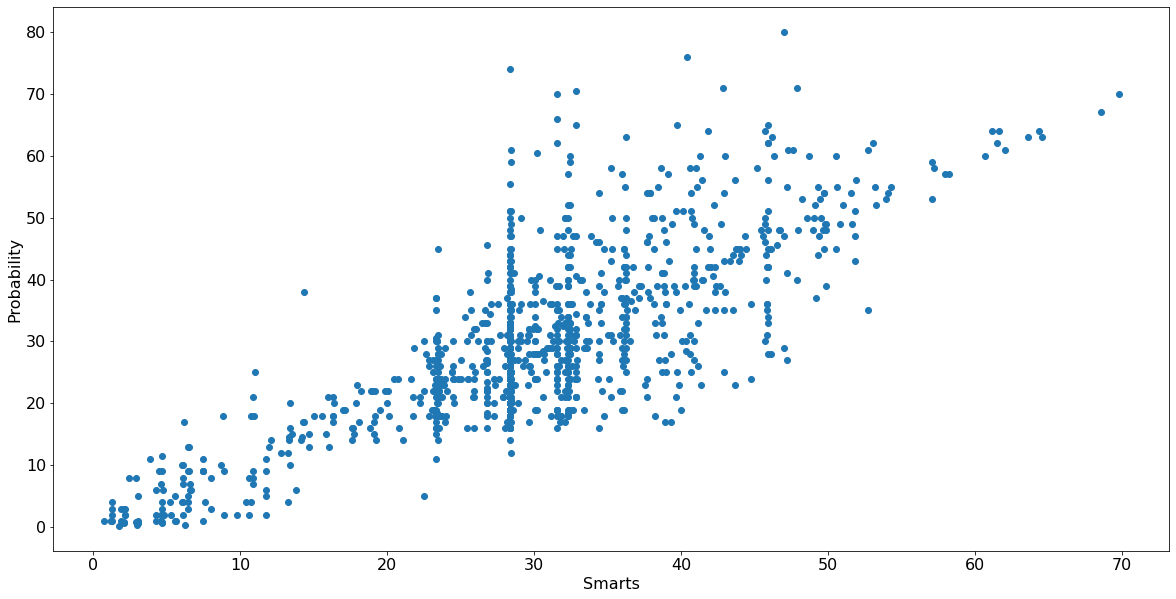

In [38]:
plt.figure(figsize=(20,10))
plt.rc('font',size = 16)
plt.scatter(mlr.predict(X_train_age), y_train_age)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.show()

In [39]:
for a, b in zip(np.array(y_train_age),mlr.predict(X_train_age)):
    print (a," ", b)

22.0   24.044385765484034
38.0   42.96297323888675
26.0   23.46047714907603
35.0   31.580186081807643
35.0   28.370949632764304
54.0   37.85634649244448
2.0   4.2782834181876
27.0   30.638149665808562
14.0   21.05330201437948
4.0   1.2573428324147682
58.0   35.21702336431886
20.0   28.370949632764304
39.0   35.72999206744107
14.0   23.46749383785798
55.0   36.20187761037362
2.0   6.061894916586903
31.0   31.08487865471748
35.0   34.38542754864741
34.0   32.26473241193531
15.0   23.305758018469113
28.0   46.135491290527426
8.0   8.012440363705597
38.0   38.88859263016892
19.0   19.494624312094913
40.0   47.858547360897106
66.0   31.544542509461998
28.0   40.5916728461741
42.0   36.26154133590273
21.0   28.370949632764304
18.0   19.165529514289492
14.0   14.14233562242653
40.0   33.232890697294046
27.0   32.91111441506807
3.0   1.8571686771330733
19.0   23.31403172843656
18.0   31.105840161819664
7.0   4.621252290257718
21.0   28.374055198535544
49.0   42.72731875558336
29.0   32.4149668

29.0   28.373381911876344
32.0   28.37436575511267
43.0   39.16130458217181
24.0   28.36334099662475
64.0   61.17495783147205
30.0   34.43188241762349
0.83   4.656831765183846
55.0   54.27613780322753
45.0   32.02884792046822
18.0   28.36334099662475
22.0   26.78081284923216
37.0   23.321158150621862
55.0   50.632242114903825
17.0   23.32207929033157
57.0   39.12361999140287
19.0   31.544542509461998
27.0   28.373381911876344
22.0   23.549197909644654
26.0   28.37436575511267
25.0   26.77984128006767
26.0   32.26473241193531
33.0   45.91266044693823
39.0   31.487413619956303
23.0   28.383371895849265
12.0   13.23257152741423
46.0   37.68248644582757
29.0   36.23991558041405
21.0   32.26473241193531
48.0   38.822593239635744
39.0   41.03342791767911
19.0   16.964739620991192
27.0   28.372865145732007
30.0   45.71349760887832
32.0   32.26473241193531
39.0   37.247938141249826
25.0   32.10967776899797
18.0   31.544542509461998
32.0   28.376798034224706
58.0   57.194448883121886
16.0   23.

In [40]:
mlr.predict(X_predict_age)

array([32.92445391, 32.26473241, 34.73700536, 26.78081285, 23.31403173,
       28.37286515, 22.9522959 , 23.32115815, 26.77984128, 26.62563937,
       28.37094963, 44.24168059, 23.32115815, 10.73358726, 46.13549129,
       40.32115547,  6.56987173, 28.37286515, 28.37094963, 23.31908972,
       28.37094963, 28.37094963, 28.37286515, 28.37436576, 35.72421017,
       28.37094963, 32.8143799 ,  7.58483478, 31.22407752, 28.38011105,
       28.363341  , 13.29195892, 52.1690627 , 45.68633904,  4.27768253,
       25.91068777, 28.62569166, 38.42808749, 41.7317509 , 32.8143799 ,
       23.32115815, 26.08232842, 44.01714422, 28.37286515,  8.05174332,
       23.5006238 , 14.18769646, 36.77251833, 28.38088744, 46.9817899 ,
       32.8143799 , 23.32115815, 47.31916898, 23.32115815, 28.51974492,
       45.71349761, 40.32115547, 47.16324375, 23.32115815, 61.59176653,
       31.28407755, 28.37094963, 35.27781524, 26.08232842, 53.07312545,
       54.87184023, 28.37286515, 31.51127038, 46.41790102, 26.78

In [41]:
full_df["Age"][Age_None_list] = mlr.predict(X_predict_age).tolist()

<ipython-input-41-15f8eac1e1e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df["Age"][Age_None_list] = mlr.predict(X_predict_age).tolist()


In [42]:
train_df, test_df = extract_df()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Sex           891 non-null    int32  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Title_Dr      891 non-null    uint8  
 7   Title_Master  891 non-null    uint8  
 8   Title_Miss    891 non-null    uint8  
 9   Title_Mr      891 non-null    uint8  
 10  Title_Mrs     891 non-null    uint8  
 11  Title_Rare    891 non-null    uint8  
 12  Pclass_1      891 non-null    uint8  
 13  Pclass_2      891 non-null    uint8  
 14  Pclass_3      891 non-null    uint8  
 15  Embarked_C    891 non-null    uint8  
 16  Embarked_Q    891 non-null    uint8  
 17  Embarked_S    891 non-null    uint8  
dtypes: float64(3), int32(1), int64

In [43]:
full_df

,Survived,Sex,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.000000,1,0,7.2500,0,0,0,1,0,0,0,0,1,0,0,1
1,1.0,0,38.000000,1,0,71.2833,0,0,0,0,1,0,1,0,0,1,0,0
2,1.0,0,26.000000,0,0,7.9250,0,0,1,0,0,0,0,0,1,0,0,1
3,1.0,0,35.000000,1,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,1
4,0.0,1,35.000000,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,1,28.370950,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1
1305,NaN,0,39.000000,0,0,108.9000,0,0,0,0,0,1,1,0,0,1,0,0
1306,NaN,1,38.500000,0,0,7.2500,0,0,0,1,0,0,0,0,1,0,0,1
1307,NaN,1,28.370950,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1


In [44]:
X_train = full_df[full_df["Survived"].notnull()]
X_train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1,22.0,1,0,7.2500,0,0,0,1,0,0,0,0,1,0,0,1
1,1.0,0,38.0,1,0,71.2833,0,0,0,0,1,0,1,0,0,1,0,0
2,1.0,0,26.0,0,0,7.9250,0,0,1,0,0,0,0,0,1,0,0,1
3,1.0,0,35.0,1,0,53.1000,0,0,0,0,1,0,1,0,0,0,0,1
4,0.0,1,35.0,0,0,8.0500,0,0,0,1,0,0,0,0,1,0,0,1


In [45]:
y_train = full_df["Survived"][full_df["Survived"].notnull()]
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [46]:
X_predict = full_df[full_df["Survived"].isnull()]
X_predict.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
891,NaN,1,34.5,0,0,7.8292,0,0,0,1,0,0,0,0,1,0,1,0
892,NaN,0,47.0,1,0,7.0000,0,0,0,0,1,0,0,0,1,0,0,1
893,NaN,1,62.0,0,0,9.6875,0,0,0,1,0,0,0,1,0,0,1,0
894,NaN,1,27.0,0,0,8.6625,0,0,0,1,0,0,0,0,1,0,0,1
895,NaN,0,22.0,1,1,12.2875,0,0,0,0,1,0,0,0,1,0,0,1


In [47]:
try:
    X_train.drop("Survived",axis=1,inplace = True)
    X_predict.drop("Survived",axis=1,inplace = True)
except:
    print("except")



from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_predict = scaler.transform(X_predict)

C:\Users\utilisateur\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [96]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(100,150,200),(100,150,200,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 150, 200), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [143]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation = 'relu',solver='lbfgs', alpha=0.05,
                     hidden_layer_sizes=(100,150,200,), learning_rate='constant', max_iter = 1000, random_state=1)
clf.fit(X_train, y_train)      

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.05, hidden_layer_sizes=(100, 150, 200), max_iter=1000,
              random_state=1, solver='lbfgs')

In [144]:
clf.score(X_train, y_train)    

0.9607182940516273

In [50]:
clf.predict(X_train)

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0.

In [51]:
SubCol02 = clf.predict(X_predict).astype(int)
SubCol02

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
submission = pd.DataFrame({
        "PassengerId": SubCol01,
        "Survived": SubCol02
    })

submission.to_csv("titanic_submission.csv", index=False)

In [53]:
submission.head()

,PassengerId,Survived
891,892,0
892,893,0
893,894,1
894,895,0
895,896,0


In [148]:
submission['Survived'].value_counts()

0    260
1    158
Name: Survived, dtype: int64